In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("pubchem_dataset.csv",sep="\t")

In [3]:
df.head()

,PubchemFP0,PubchemFP3,PubchemFP9,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP19,...,PubchemFP842,PubchemFP843,PubchemFP845,PubchemFP847,PubchemFP860,PubchemFP861,PubchemFP866,PubchemFP868,PubchemFP875,Label
0,1,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X= df.drop("Label",axis=1)

In [5]:
X.head()

,PubchemFP0,PubchemFP3,PubchemFP9,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP19,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP845,PubchemFP847,PubchemFP860,PubchemFP861,PubchemFP866,PubchemFP868,PubchemFP875
0,1,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = df["Label"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [8]:
rf = RandomForestClassifier(random_state=42)

In [9]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Evaluating normal model

In [22]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix,ConfusionMatrixDisplay,classification_report

In [12]:
y_pred = rf.predict(X_test)

In [13]:
accuracy_score(y_test,y_pred)

0.8501498501498501

In [14]:
precision_score(y_test,y_pred)

0.8756613756613757

In [15]:
recall_score(y_test,y_pred)

0.9220055710306406

In [17]:
cm = confusion_matrix(y_test,y_pred)

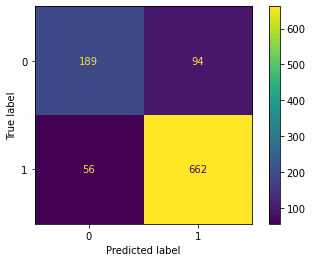

In [20]:
display = ConfusionMatrixDisplay(cm,display_labels=rf.classes_)
display.plot()

In [24]:
print(classification_report(y_test,y_pred,labels=rf.classes_))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       283
           1       0.88      0.92      0.90       718

    accuracy                           0.85      1001
   macro avg       0.82      0.79      0.81      1001
weighted avg       0.85      0.85      0.85      1001



+ It seems that the model works well on Actives more than inactives. 

In [27]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [64]:
param_grid = [{
        'max_features': [50,100,200,250],
        'n_estimators': [50,100,150],
        'random_state': [42]
        
}]


In [65]:
grid = GridSearchCV(RandomForestClassifier(random_state=42),param_grid=param_grid,cv=10)

In [66]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [50, 100, 200, 250],
                          'n_estimators': [50, 100, 150],
                          'random_state': [42]}])

In [73]:
grid.best_estimator_.fit(X_train,y_train)

RandomForestClassifier(max_features=50, random_state=42)

In [75]:
y_pred_ = grid.best_estimator_.predict(X_test)

In [78]:
print(classification_report(y_test,y_pred,labels=rf.classes_))
print(classification_report(y_test,y_pred_,labels=rf.classes_))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       283
           1       0.88      0.92      0.90       718

    accuracy                           0.85      1001
   macro avg       0.82      0.79      0.81      1001
weighted avg       0.85      0.85      0.85      1001

              precision    recall  f1-score   support

           0       0.77      0.69      0.72       283
           1       0.88      0.92      0.90       718

    accuracy                           0.85      1001
   macro avg       0.82      0.80      0.81      1001
weighted avg       0.85      0.85      0.85      1001



***

In [79]:
df = pd.read_csv("subfp_dataset.csv",sep="\t")

In [80]:
X= df.drop("Label",axis=1)
y= df["Label"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [82]:
rf = RandomForestClassifier(random_state=42)

In [83]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [84]:
y_pred = rf.predict(X_test)

In [85]:
print(classification_report(y_test,y_pred,labels=rf.classes_))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       283
           1       0.86      0.91      0.89       718

    accuracy                           0.83      1001
   macro avg       0.80      0.77      0.78      1001
weighted avg       0.82      0.83      0.83      1001



In [86]:
param_grid = [{
        'max_features': [50,100,200,250],
        'n_estimators': [50,100,150,200],
        'random_state': [42]
        
}]



In [87]:
grid = GridSearchCV(RandomForestClassifier(random_state=42),param_grid=param_grid,cv=10)

In [88]:
grid.fit(X_train,y_train)

/Users/sherifelsabbagh/opt/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sherifelsabbagh/opt/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sherifelsabbagh/opt/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/sherifelsabbagh/opt/anaconda3/envs/my-rdkit-env/lib/py

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [50, 100, 200, 250],
                          'n_estimators': [50, 100, 150, 200],
                          'random_state': [42]}])

In [89]:
grid.best_score_

0.8398672069825437

In [90]:
grid.best_params_

{'max_features': 50, 'n_estimators': 100, 'random_state': 42}

In [91]:
grid.best_estimator_.fit(X_train,y_train)

RandomForestClassifier(max_features=50, random_state=42)

In [92]:
y_pred_ = grid.best_estimator_.predict(X_test)

In [94]:
print(classification_report(y_test,y_pred,labels=rf.classes_))
print(classification_report(y_test,y_pred_,labels=rf.classes_))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       283
           1       0.86      0.91      0.89       718

    accuracy                           0.83      1001
   macro avg       0.80      0.77      0.78      1001
weighted avg       0.82      0.83      0.83      1001

              precision    recall  f1-score   support

           0       0.71      0.63      0.67       283
           1       0.86      0.90      0.88       718

    accuracy                           0.82      1001
   macro avg       0.79      0.77      0.78      1001
weighted avg       0.82      0.82      0.82      1001

